# Data Exploration

## Preparation
Add the following columns to the data:
- trial_nr
- notification_status
- browser
- frequency
- distribution

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:

df_1 = pd.read_csv('../00-data/trial_1.csv')
df_2 = pd.read_csv('../00-data/trial_2.csv')
df_7 = pd.read_csv('../00-data/trial_7.csv')

Combine the 20 files into one data frame.

In [22]:
# df = ... 

## Summary of Data

- summary
- SD, Mean, Median, Min, Max

In [23]:
df_1['Energy trapz (J)'].describe()

count    30.000000
mean     46.231307
std       2.426237
min      35.072987
25%      45.928497
50%      46.741965
75%      47.259847
max      49.779550
Name: Energy trapz (J), dtype: float64

In [24]:
# df.summarize()...
df_2['Energy trapz (J)'].describe()

count    30.000000
mean     48.062190
std       2.258378
min      40.902735
25%      46.846682
50%      47.755688
75%      49.694906
max      52.517839
Name: Energy trapz (J), dtype: float64

In [25]:
df_7['Energy trapz (J)'].describe()

count    30.000000
mean     58.437859
std       2.805958
min      48.695347
25%      57.336675
50%      58.346660
75%      59.243773
max      66.420982
Name: Energy trapz (J), dtype: float64

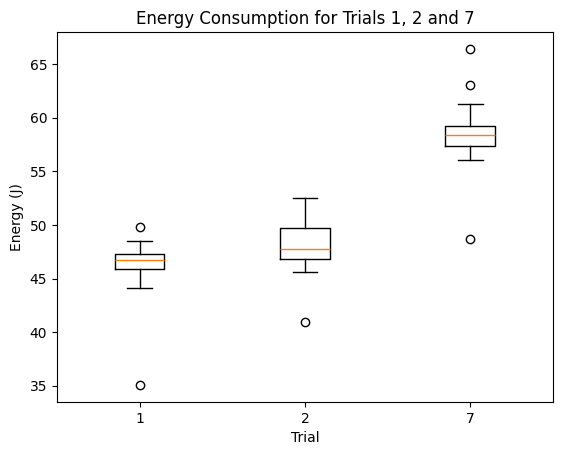

In [26]:
data = [ df_1['Energy trapz (J)'], df_2['Energy trapz (J)'], df_7['Energy trapz (J)']]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['1', '2', '7'])
ax.set_ylabel('Energy (J)')
ax.set_xlabel('Trial')
ax.set_title('Energy Consumption for Trials 1, 2 and 7')
plt.show()

## Clean Data

Remove outliers? 